<a href="https://colab.research.google.com/github/baldpanda/beginner_scraper/blob/extracting-different-genres-of-book/beginner_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginner Scraper

Notebook for learning how to scrape data from webpages. The plan is to start scraping this [website](http://books.toscrape.com/), which is designed for learning to scrape. It is a simple book store with pagination and a navigation bar. Each book has an image of the front cover, a title, a status (in stock, out of stock), and a rating out of 5 stars.

### Requests

The requests library allows the user to send HTTP requests to a URL. It abstracts a lot of the complexity behind interacting with APIs.



### Beautiful Soup

Beautiful soup allows users to extract data out of XML and HTML formats, into a more usable format.  


In [0]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
WEBSITE_URL = "http://books.toscrape.com/"
web_url = requests.get(WEBSITE_URL).text

In [0]:
# print(BeautifulSoup(web_url).prettify)

## Navigation Bar
Extracting the navigation bar from home page.

In [0]:
navigation_bar = BeautifulSoup(web_url, 'html.parser').find_all('ul')[1]

In [0]:
genres = navigation_bar.find_all('li')[0].find_all('li')

In [0]:
genre_names = []
genre_hrefs = []

for genre in genres:
  genre_name = genre.get_text().replace(" ", "").replace("\n", "")
  genre_href = genre.find_all('a', href=True)[0]['href']
  genre_names.append(genre_name)
  genre_hrefs.append(genre_href)

In [0]:
genre_dict = {"genre_name":genre_names, "genre_href":genre_hrefs}

In [0]:
genre_df = pd.DataFrame(genre_dict)
genre_df.head()

,genre_name,genre_href
0,Travel,catalogue/category/books/travel_2/index.html
1,Mystery,catalogue/category/books/mystery_3/index.html
2,HistoricalFiction,catalogue/category/books/historical-fiction_4/...
3,SequentialArt,catalogue/category/books/sequential-art_5/inde...
4,Classics,catalogue/category/books/classics_6/index.html


## Book Section
Extracting the book section.

In [0]:
books_section = BeautifulSoup(web_url, 'html.parser').find_all('ol')[0]

In [0]:
def parse_html(web_url):
  return BeautifulSoup(web_url, 'html.parser')

def get_book_section(parsed_html):
  return parsed_html.find_all('ol')[0]

In [0]:
parsed_html = parse_html(web_url)
book_section = get_book_section(parsed_html)

In [0]:
num_books_first_page = len(book_section.find_all('article'))
print(f"There are {num_books_first_page} books on the first page.")

There are 20 books on the first page.


In [0]:
ratings = books_section.find_all('p')[0::3]

In [0]:
first_page_ratings = [rating['class'][1] for rating in ratings]
first_page_ratings

['Three',
 'One',
 'One',
 'Four',
 'Five',
 'One',
 'Four',
 'Three',
 'Four',
 'One',
 'Two',
 'Four',
 'Five',
 'Five',
 'Five',
 'Three',
 'One',
 'One',
 'Two',
 'Two']

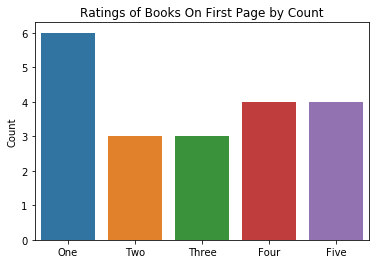

In [0]:
ax = sns.countplot(first_page_ratings, 
                   order=['One', 'Two', 'Three', 'Four', 'Five'])

ax.set(ylabel = 'Count', title = 'Ratings of Books On First Page by Count');

In [0]:
costs = books_section.find_all('p')[1::3]

In [0]:
first_page_book_costs = [float(cost.get_text()[2:]) for cost in costs]

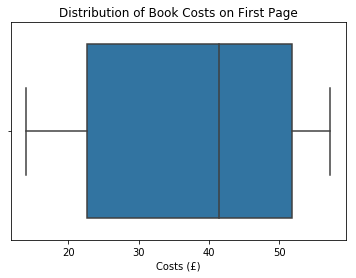

In [0]:
ax = sns.boxplot(first_page_book_costs);
ax.set(xlabel = 'Costs (£)', title = 'Distribution of Book Costs on First Page');

## Scraping Multiple Pages

From inspection, there are 50 pages each with 20 books displayed on the website. 

The url for the nth page follows the format:

http://books.toscrape.com/catalogue/page-n.html

Where n is an integer between 1 and 50.

In [0]:
URL_PREFIX = "http://books.toscrape.com/catalogue/page-"
URL_SUFFIX = ".html"

star_ratings = []
costs = []

for page in range(1, 51):
  book_store_page = URL_PREFIX + str(page) + URL_SUFFIX
  parsed_html = parse_html(requests.get(book_store_page).text)
  book_section = get_book_section(parsed_html)
  ratings = book_section.find_all('p')[0::3]
  page_ratings = [rating['class'][1] for rating in ratings]
  star_ratings = star_ratings + page_ratings
  
  costs_per_page_section = book_section.find_all('p')[1::3]
  costs_per_page = [float(cost.get_text()[2:]) for cost in costs_per_page_section]
  costs =  costs + costs_per_page
  

In [0]:
print(f"Total number of books in book store: {len(star_ratings)}")

Total number of books in book store: 1000


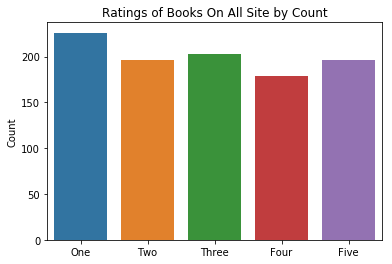

In [0]:
ax = sns.countplot(star_ratings, 
                   order=['One', 'Two', 'Three', 'Four', 'Five'])

ax.set(ylabel = 'Count', title = 'Ratings of Books On All Site by Count');

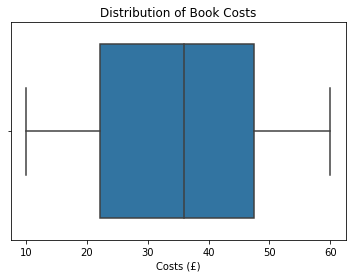

In [0]:
ax = sns.boxplot(costs);
ax.set(xlabel = 'Costs (£)', title = 'Distribution of Book Costs');